Processing image with EasyOCR...
Processing time: 0.76 seconds

Recognized text:
POP! GOES MY HEART Words and Music by ANDREW WYATT and ALANNA VICENTE Eighties dance groove =132 Sim: Verse_ Bm nev er thought that could be fied time that See additiomal bricz D:us lock in FouI eyes. shcck in - side tat word: can t sCfibe; ZC07 DOWNTOWN MusIC PUBLISHING LLC (ASCAP HAZEN MUSIC (ASCAP) AII Rignts Acministered py WB MUSI CORR Rights Reservec JuSt

Output image with boxes and labels saved as ocr_result_with_boxes.png


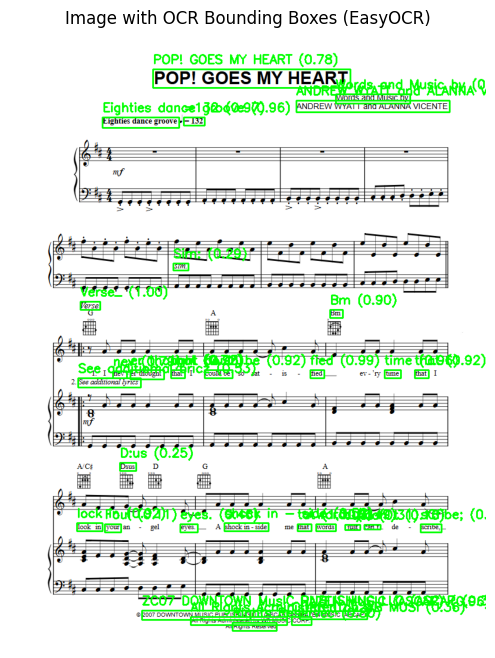

In [14]:
import os
import easyocr
import cv2
import time

def ocr_with_visualization(image_path, output_path="easyocr_result_with_boxes.png"):
    """
    Process image with OCR and visualize results
    """
    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])
    
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to read image: {image_path}")
    
    # Perform OCR
    start_time = time.time()
    results = reader.readtext(image)
    processing_time = time.time() - start_time
    
    # Process results
    recognized_text = []
    
    # Draw bounding boxes and text
    for (bbox, text, prob) in results:
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        br = (int(br[0]), int(br[1]))
        
        # Draw rectangle
        cv2.rectangle(image, tl, br, (0, 255, 0), 2)
        
        # Add text with confidence
        text_with_conf = f"{text} ({prob:.2f})"
        cv2.putText(image, text_with_conf, (tl[0], tl[1] - 10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
        recognized_text.append(text)
    
    # Save annotated image
    cv2.imwrite(output_path, image)
    
    print(f"Processing time: {processing_time:.2f} seconds")
    return " ".join(recognized_text)

def main():
    # Process image
    image_to_process = "testOCR.png"
    if os.path.exists(image_to_process):
        print("Processing image with EasyOCR...")
        recognized_text = ocr_with_visualization(image_to_process)
        print("\nRecognized text:")
        print(recognized_text)
        print("\nOutput image with boxes and labels saved as ocr_result_with_boxes.png")
    else:
        print(f"Image file {image_to_process} not found")

if __name__ == "__main__":
    main()
    import matplotlib.pyplot as plt

    # Read the annotated image
    annotated_image = cv2.imread("easyocr_result_with_boxes.png")
    if annotated_image is not None:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Image with OCR Bounding Boxes (EasyOCR)")
        plt.axis("off")
        plt.show()
    else:
        print("Annotated image not found.")

In [6]:
import os
import cv2
import time
import pytesseract
import numpy as np

# Set Tesseract path
pytesseract.pytesseract.tesseract_cmd = r'G:\LICENTA\Tesseract-OCR\tesseract.exe'

def ocr_with_visualization(image_path, output_path="pytesseact_ocr_result_with_boxes.png"):
    """
    Process image with OCR and visualize results using pytesseract
    """
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Failed to read image: {image_path}")
    
    # Convert image to RGB (pytesseract expects RGB)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform OCR
    start_time = time.time()
    
    # Get OCR data with bounding boxes
    ocr_data = pytesseract.image_to_data(rgb_image, output_type=pytesseract.Output.DICT)
    processing_time = time.time() - start_time
    
    # Process results
    recognized_text = []
    
    # Draw bounding boxes and text
    n_boxes = len(ocr_data['text'])
    for i in range(n_boxes):
        # Filter out empty strings and low confidence predictions
        if int(ocr_data['conf'][i]) > 70:  # Confidence threshold
            x, y, w, h = (ocr_data['left'][i], ocr_data['top'][i], 
                         ocr_data['width'][i], ocr_data['height'][i])
            
            # Draw rectangle
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            # Add text with confidence
            text = ocr_data['text'][i]
            conf = ocr_data['conf'][i]
            text_with_conf = f"{text} ({conf:.2f})"
            cv2.putText(image, text_with_conf, (x, y - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            
            recognized_text.append(text)
    
    # Save annotated image
    cv2.imwrite(output_path, image)
    
    print(f"Processing time: {processing_time:.2f} seconds")
    return " ".join(recognized_text)

def main():
    # Process image
    image_to_process = "output3.png"
    if os.path.exists(image_to_process):
        print("Processing image with pytesseract...")
        recognized_text = ocr_with_visualization(image_to_process)
        print("\nRecognized text:")
        print(recognized_text)
        print("\nOutput image with boxes and labels saved as ocr_result_with_boxes.png")
    else:
        print(f"Image file {image_to_process} not found")

if __name__ == "__main__":
    main()
    import matplotlib.pyplot as plt

    # Display the annotated image with bounding boxes if available
    if 'annotated_image' in locals():
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.title("Image with OCR Bounding Boxes (pytesseract)")
        plt.axis("off")
        plt.show()
        # Save the annotated image after displaying
        cv2.imwrite("pytesseract_annotated_image.png", annotated_image)
        print("Annotated image saved as pytesseract_annotated_image.png")
    else:
        print("Annotated image not found.")

Processing image with pytesseract...
Processing time: 0.58 seconds

Recognized text:
Final Processed (Original Size)   Beautiful Things Piano                                                                                                                                           

Output image with boxes and labels saved as ocr_result_with_boxes.png
Annotated image not found.


Portative detectate (fiecare cu 5 linii Y-coords): [[288, 294, 300, 306, 311], [349, 355, 361, 367, 372], [520, 526, 532, 538, 544]]
Spațiere medie generală între linii: 18.29 pixeli
Portativ la Y: 288-311, Zona sigură: (269.71, 329.29)
Portativ la Y: 349-372, Zona sigură: (330.71, 390.29)
Portativ la Y: 520-544, Zona sigură: (501.71, 562.29)
Zone sigure consolidate: [(269.7142857142857, 329.2857142857143), (330.7142857142857, 390.2857142857143), (501.7142857142857, 562.2857142857143)]
Șterg textul: 'Easy Piano Pieces' (conf: 0.78) la Y_center: 31.50
Șterg textul: 'Charley Shi' (conf: 0.95) la Y_center: 70.00
Șterg textul: 'Twinkle Twinkle Little Star (C major)' (conf: 0.58) la Y_center: 98.00
Șterg textul: 'major)' (conf: 0.85) la Y_center: 444.00
Partitura curățată (zone albe) salvată în: partitura_fara_versuri_curatata.png


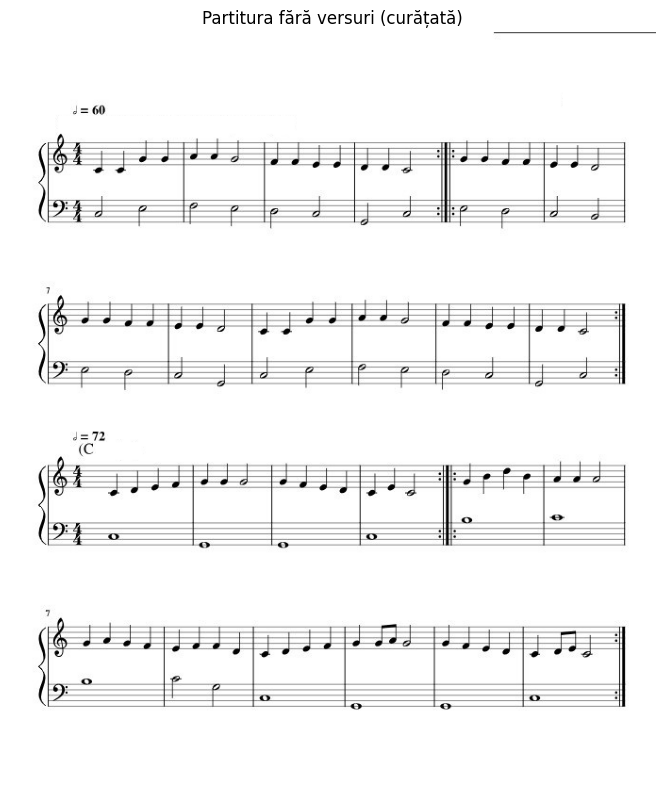

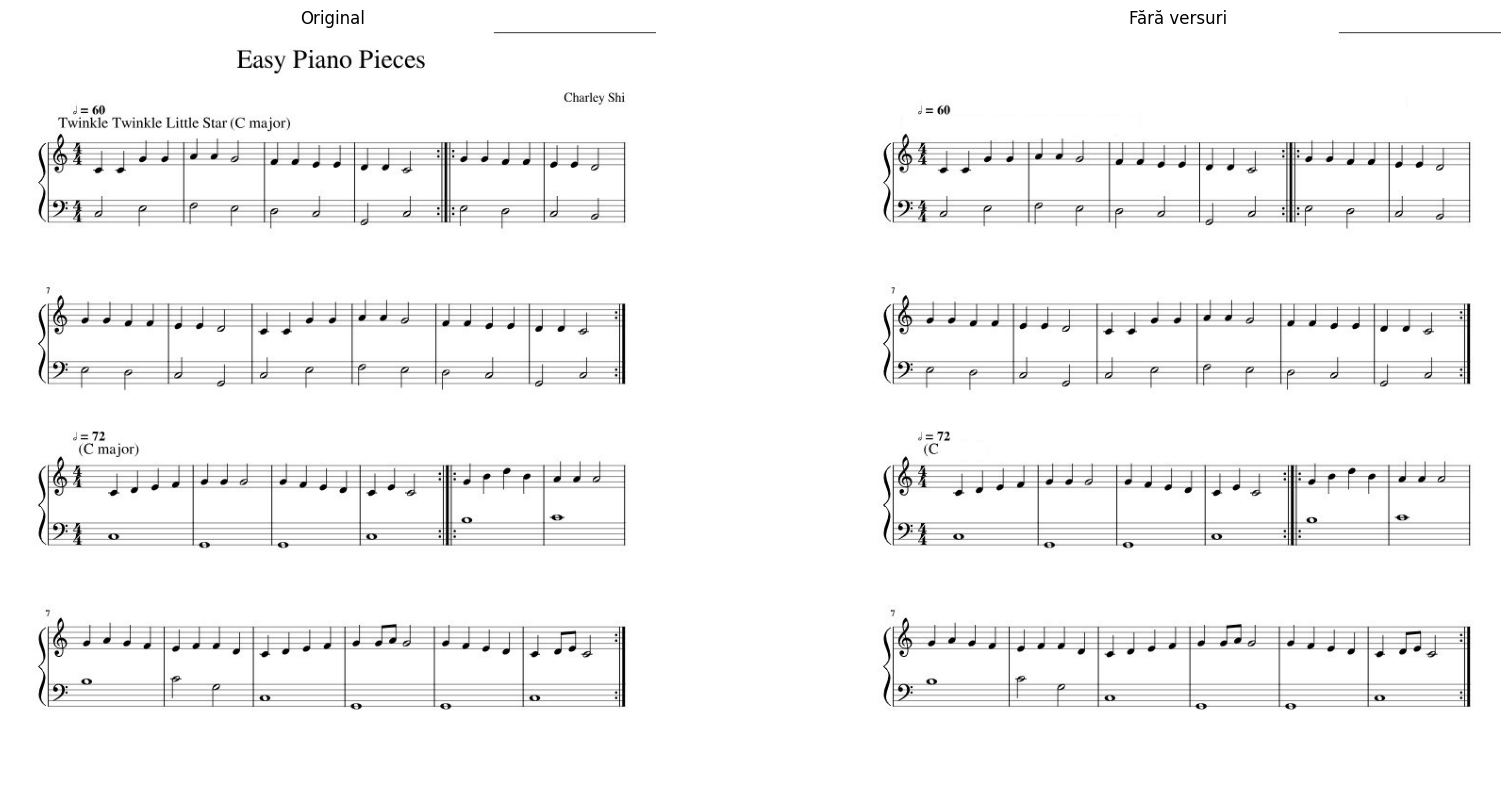

In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

def detect_staff_lines(image):
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 5)
    
    horizontal_projection = np.sum(binary, axis=1) / 255
    smoothed_proj = cv2.GaussianBlur(horizontal_projection.astype(np.float32), (3, 3), 0)
    
    threshold = 0.2 * np.max(smoothed_proj)
    peaks = np.where(smoothed_proj > threshold)[0]

    if not peaks.size:
        print("Nu s-au detectat vârfuri în proiecția orizontală.")
        return []

    candidate_staff_groups = []
    current_group = [peaks[0]]
    for i in range(1, len(peaks)):
        if peaks[i] - peaks[i-1] < 20:
            current_group.append(peaks[i])
        else:
            candidate_staff_groups.append(current_group)
            current_group = [peaks[i]]
    candidate_staff_groups.append(current_group)

    detected_staffs = []
    for group in candidate_staff_groups:
        if len(group) < 5:
            continue

        staff_lines_in_group = []
        for y_approx in group:
            slice_height = 5
            y_start = max(0, y_approx - slice_height)
            y_end = min(binary.shape[0], y_approx + slice_height + 1)
            roi = binary[y_start:y_end, :]
            
            row_sums = np.sum(roi, axis=1) / 255
            
            if row_sums.size > 0 and np.max(row_sums) > 0:
                exact_y = np.argmax(row_sums) + y_start
                staff_lines_in_group.append(exact_y)
        
        staff_lines_in_group = sorted(list(set(staff_lines_in_group)))
        
        if len(staff_lines_in_group) >= 5:
            best_5_lines = []
            min_std_spacing = float('inf')

            for i in range(len(staff_lines_in_group) - 4):
                current_5 = staff_lines_in_group[i : i+5]
                spacings = np.diff(current_5)
                if np.max(spacings) - np.min(spacings) < 5:
                    std_spacing = np.std(spacings)
                    if std_spacing < min_std_spacing:
                        min_std_spacing = std_spacing
                        best_5_lines = current_5
            
            if best_5_lines and min_std_spacing < 3:
                total_height = best_5_lines[-1] - best_5_lines[0]
                avg_spacing_candidate = np.mean(np.diff(best_5_lines))
                
                if abs(total_height - (4 * avg_spacing_candidate)) < 10:
                     detected_staffs.append(best_5_lines)

    print(f"Portative detectate (fiecare cu 5 linii Y-coords): {detected_staffs}")
    return detected_staffs


def remove_lyrics_from_score(image_path, output_path='partitura_fara_versuri_curatata.png'):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Imaginea nu a putut fi încărcată de la calea: {image_path}")
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    detected_staffs = detect_staff_lines(gray)
    
    if not detected_staffs:
        print("Avertisment: Nu s-au detectat portative complete (5 linii). Niciun vers nu va fi șters.")
        cv2.imwrite(output_path, image)
        return image

    reader = easyocr.Reader(['ro', 'en']) 
    results = reader.readtext(image)

    cleaned_image = image.copy()

    safe_zones = []
    
    avg_line_spacing_overall = 0
    if detected_staffs:
        all_staff_lines_flat = [y for staff in detected_staffs for y in staff]
        if len(all_staff_lines_flat) > 1:
             avg_line_spacing_overall = np.mean(np.diff(sorted(all_staff_lines_flat)))
             print(f"Spațiere medie generală între linii: {avg_line_spacing_overall:.2f} pixeli")

    safe_zone_margin = avg_line_spacing_overall if avg_line_spacing_overall > 0 else 30 
    
    for staff in detected_staffs:
        if staff:
            min_y_staff = min(staff)
            max_y_staff = max(staff)
            
            safe_y_start = max(0, min_y_staff - safe_zone_margin)
            safe_y_end = min(image.shape[0], max_y_staff + safe_zone_margin)
            safe_zones.append((safe_y_start, safe_y_end))
            print(f"Portativ la Y: {staff[0]}-{staff[-1]}, Zona sigură: ({safe_y_start:.2f}, {safe_y_end:.2f})")

    safe_zones.sort()
    merged_safe_zones = []
    if safe_zones:
        current_start, current_end = safe_zones[0]
        for i in range(1, len(safe_zones)):
            next_start, next_end = safe_zones[i]
            if next_start <= current_end:
                current_end = max(current_end, next_end)
            else:
                merged_safe_zones.append((current_start, current_end))
                current_start, current_end = next_start, next_end
        merged_safe_zones.append((current_start, current_end))

    print(f"Zone sigure consolidate: {merged_safe_zones}")

    for (bbox, text, conf) in results:
        ys = [point[1] for point in bbox]
        if not ys:
            continue
        
        y_center = sum(ys) / len(ys)
        
        is_in_safe_zone = False
        for safe_start, safe_end in merged_safe_zones:
            if safe_start <= y_center <= safe_end:
                is_in_safe_zone = True
                break
        
        if not is_in_safe_zone:
            print(f"Șterg textul: '{text}' (conf: {conf:.2f}) la Y_center: {y_center:.2f}")
            pts = np.array(bbox, dtype=np.int32)
            cv2.fillPoly(cleaned_image, [pts], (255, 255, 255))
        else:
            print(f"Păstrez textul: '{text}' (conf: {conf:.2f}) la Y_center: {y_center:.2f} (în zona sigură)")

    cv2.imwrite(output_path, cleaned_image)
    print(f"Partitura curățată (zone albe) salvată în: {output_path}")

    return cleaned_image


if __name__ == "__main__":
    input_image_path = '../Input/image.jpg'
    
    cleaned_image = remove_lyrics_from_score(input_image_path)

    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(cleaned_image, cv2.COLOR_BGR2RGB))
    plt.title('Partitura fără versuri (curățată)')
    plt.axis('off')
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(cleaned_image, cv2.COLOR_BGR2RGB))
    plt.title('Fără versuri')
    plt.axis('off')
    plt.show()
    cv2.imwrite('imagine_modificata.png', cleaned_image)